# A Comparison of Covid Deaths to Vaccination Rates Across the World

In [591]:
#import necessary packages and read the CSV file
import pandas as pd
import seaborn as sns
import numpy as np
import missingno
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv("covid-vaccination-vs-death_ratio.csv")
df.head(10)

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809
5,5,Afghanistan,AFG,2021-05-30,600152.0,480226.0,119926.0,20,40374668.0,1.189424
6,6,Afghanistan,AFG,2021-06-02,626290.0,481690.0,144600.0,34,40374668.0,1.193050
7,7,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,27,40374668.0,1.193323
8,8,Afghanistan,AFG,2021-06-08,641295.0,482952.0,158343.0,64,40374668.0,1.196176
9,9,Afghanistan,AFG,2021-06-14,662003.0,484737.0,177266.0,85,40374668.0,1.200597


# Data Cleaning

Looking at the dataframe above we can see that we won't need the "Unnamed: 0" column and the "iso_code" column so we can drop these.

In [592]:
#drop the unneccessary columns
df = df.drop(columns = ["Unnamed: 0","iso_code"])

To make this data more useful when comparing deaths and vaccination rates across countries, it would be useful to have new deaths in a ratio as well as vaccination so we'll add this as an additional column to the dataframe and rename the vaccination ratio to avoid any confusions

In [593]:
#Add a new colum to normalise the death rates as a percentage of population
df["death/population ratio"] = (df["New_deaths"]/df["population"])*100
df = df.rename(columns={"ratio":"vaccination %"})
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,vaccination %,death/population ratio
0,Afghanistan,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781,0.000030
1,Afghanistan,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941,0.000025
2,Afghanistan,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866,0.000025
3,Afghanistan,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309,0.000047
4,Afghanistan,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809,0.000035


In [594]:
df.dtypes

country                     object
date                        object
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
New_deaths                   int64
population                 float64
vaccination %              float64
death/population ratio     float64
dtype: object

Looking at the datatypes in the data we can see that the date column is in object format, this needs to be in a datetime format to ease manipulation and data handling.

In [595]:
#convert incorrect datatypes to correct format
df["date"] = pd.to_datetime(df["date"],format = "%Y-%m-%d")
df.dtypes

country                            object
date                       datetime64[ns]
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
New_deaths                          int64
population                        float64
vaccination %                     float64
death/population ratio            float64
dtype: object

# Missingness

In [596]:
#check for NaN values
df.isnull().sum()

country                    0
date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
New_deaths                 0
population                 0
vaccination %              0
death/population ratio     0
dtype: int64

We can see above that there is no missing data in any of these columns and all columns are in the correct data type so for now we can assume there is not missing data.

# Data Visualisation

In [597]:
#group the data by country and aggregate values in suitable way
country_group = df[["country","date","total_vaccinations","people_vaccinated","people_fully_vaccinated","New_deaths","population"]].groupby("country").agg({"date":["min","max"],"total_vaccinations":"max","people_vaccinated":"max","people_fully_vaccinated":"max","New_deaths":"sum","population":"mean"})
country_group = country_group.reset_index()
country_group["death_%"]=country_group[("New_deaths", "sum")]*100/country_group[('population', 'mean')]
country_group["%_part_vax"] = ((country_group[('people_vaccinated','max')])/country_group[('population', 'mean')])*100

By grouping by country and aggregating each column by a certain function we can get an overall dataset that describes all the data for each country. By taking the min and max dates we can see when the data records started and finished for each country, by taking the max of people vaccinated and people fully vaccinated columns we can see the final cumulative numbers for these categories. By taking the sum of the new deaths column, we can calculate the cumulative number of deaths across the date min - date max period. By taking the mean of the population we get the average population size for each country across ther period.

I am also adding two new columns, death_ % which is the percentage of the population that died due to covid across the period and also a column called %_part_vax, which is the percentage of the poulation that have had any form of vaccination.

In [598]:
#retrieve highest and lowest vaccination and death rates
lowest_vax = country_group.sort_values(by="%_part_vax").head(15).reset_index()
highest_vax = country_group.sort_values(by="%_part_vax", ascending = False).head(15).reset_index()
highest_deathrate =country_group.sort_values(by="death_%", ascending = False).head(15).reset_index()
lowest_deathrate =country_group.sort_values(by="death_%", ascending = True).head(15).reset_index()
lowest_deathrate

index                      country       date             \
                                             min        max   
0    176                        Tonga 2021-07-20 2022-02-28   
1    129                         Niue 2021-07-06 2022-03-13   
2    127                        Niger 2021-05-12 2022-03-24   
3     58  Falkland Islands (Malvinas) 2021-04-07 2021-04-14   
4     30                      Burundi 2021-11-09 2022-03-18   
5    121                        Nauru 2021-06-29 2022-03-21   
6     36     Central African Republic 2021-09-22 2022-03-25   
7    175                      Tokelau 2021-10-12 2021-10-12   
8     92                     Kiribati 2021-09-07 2022-03-21   
9    179                 Turkmenistan 2021-02-28 2021-09-05   
10   149                        Samoa 2021-06-21 2022-03-21   
11    37                         Chad 2021-07-05 2022-03-18   
12   116                   Montserrat 2021-03-10 2022-03-25   
13   189                      Vanuatu 2021-07-27 2022-02-28   
14    42                 Cook Islands 2021-06-08 2022-03-28   

   total_vaccinations people_vaccinated people_fully_vaccinated New_deaths  \
                  max               max                     max        sum   
0            147193.0           76910.0                 70283.0          0   
1              4161.0            1650.0                  1417.0          0   
2           2681673.0         2180972.0               1545630.0          0   
3              4407.0            2632.0                  1775.0          0   
4             12166.0           10372.0                  9906.0          0   
5             16824.0            9150.0                  7674.0          0   
6           1012846.0          923553.0                897945.0          0   
7              1936.0             968.0                   968.0          0   
8            133953.0           78620.0                 55333.0          0   
9           7580976.0         4374694.0               3206282.0          0   
10           304893.0          173862.0                131031.0          0   
11           419469.0          282003.0                153238.0          0   
12             4211.0            1897.0                  1804.0          0   
13           199464.0          114284.0                 85180.0          0   
14            29565.0           14992.0                 14573.0          0   

    population death_%  %_part_vax  
          mean                      
0     107407.0     0.0   71.606134  
1       1619.0     0.0  101.914762  
2   25677816.0     0.0    8.493604  
3       3533.0     0.0   74.497594  
4   12469663.0     0.0    0.083178  
5      10876.0     0.0   84.130195  
6    4971922.0     0.0   18.575372  
7       1373.0     0.0   70.502549  
8     122470.0     0.0   64.195313  
9    6168788.0     0.0   70.916588  
10    201011.0     0.0   86.493774  
11  17203787.0     0.0    1.639191  
12      4977.0     0.0   38.115331  
13    318774.0     0.0   35.851105  
14     17565.0     0.0   85.351551

The dataframe above shows the top 20 countries sorted by the highest death rate, of this list we can see that Ukraine and Argentina are very comparable in population size and death rate, but Argentina has a much higher vaccination rate than Ukraine.

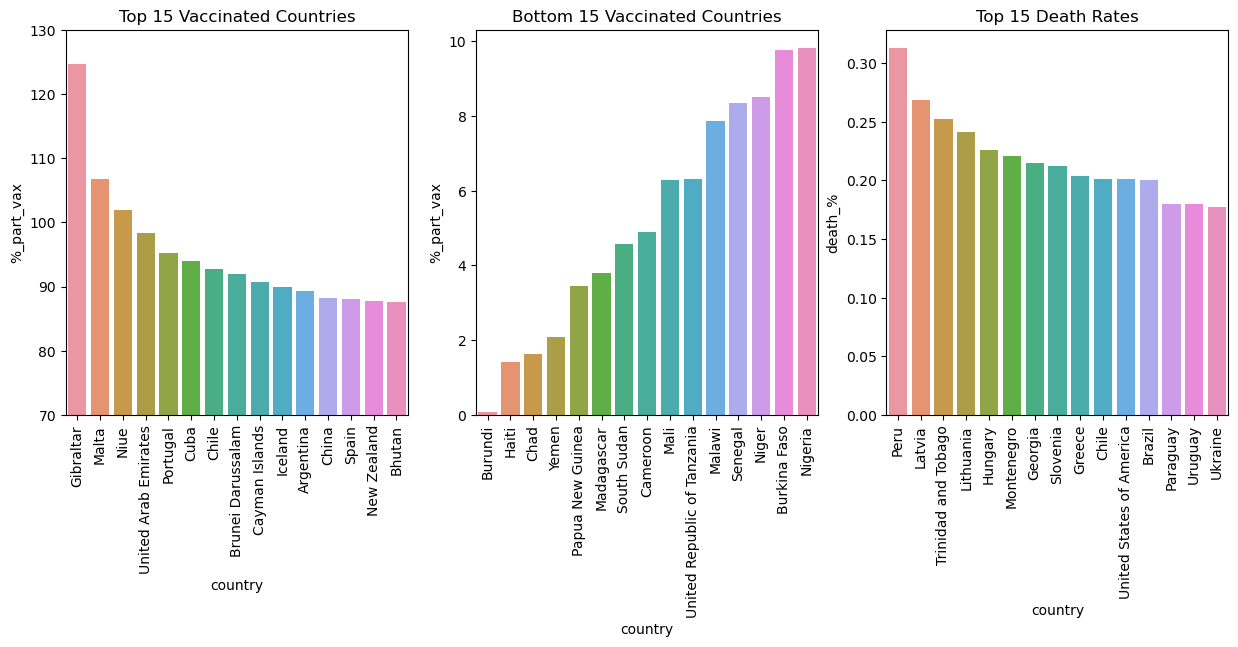

In [599]:
#plot bar graphs to view the top vaccinated countries, the least vaccinated and the top death rates
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.barplot(ax=ax[0],data=highest_vax, x="country", y="%_part_vax").set_ylim(70, 130)
ax[0].tick_params("x",labelrotation=90)
sns.barplot(ax=ax[1],data=lowest_vax, x="country", y="%_part_vax")
ax[1].tick_params("x",labelrotation=90)
sns.barplot(ax=ax[2],data=highest_deathrate, x="country", y="death_%")
plt.xticks(rotation=90)
ax[0].set_title("Top 15 Vaccinated Countries")
ax[1].set_title("Bottom 15 Vaccinated Countries")
ax[2].set_title("Top 15 Death Rates")
plt.show()

The above graphs show the 15 countries with the highest and lowest vaccination rates and the 15 countries with the highest death rates.

Below I have retrieved data to compare some individual countries. I have selected the UK to see how this compares to elsewhere.

Ukraine and Argentina have similar population sizes of 43,312,073, 45,847,428 repectively but however have vastly differing vaccination rates with Argentina being one of the most vaccinated countries with 89.2% of the population being at least partially vaccinated by the March 2022 and Ukraine only reaching a 36.3% vaccination rate by February 2022.
I have also selected Australia and Sri Lanka to compare as they also have similar population sizes 21,200,432 and 21,547,096 respectively however Australia had a slightly higher vaccination rate than Sri Lanka around 86% compared to 78% but suffered a delayed introduction to the virus due to government policy.

The UK for comparison has the largest population of 68,401,087 and a similar vaccination rate to Sri Lanka of 77% by March 2022.


In [600]:
#retrieve the selected country's data for display purposes
country_group.loc[(country_group["country"]=="Ukraine")|(country_group["country"]=="Argentina")|(country_group["country"]=="The United Kingdom")|(country_group["country"]=="Australia")|(country_group["country"]=="Sri Lanka")]

country       date            total_vaccinations  \
                               min        max                max   
7             Argentina 2020-12-29 2022-03-29         96504666.0   
10            Australia 2021-02-23 2022-03-29         56242913.0   
165           Sri Lanka 2021-04-29 2022-03-22         39102567.0   
173  The United Kingdom 2021-01-10 2022-03-28        140968337.0   
183             Ukraine 2021-03-16 2022-02-23         31683310.0   

    people_vaccinated people_fully_vaccinated New_deaths  population  \
                  max                     max        sum        mean   
7          40907186.0              36924451.0      80557  45847428.0   
10         22202366.0              21200432.0       4988  25959987.0   
165        16995787.0              14387077.0      13559  21547096.0   
173        52788065.0              49404026.0      84770  68401087.0   
183        15729617.0              15221792.0      76796  43312073.0   

      death_% %_part_vax  
                          
7    0.175707  89.224604  
10   0.019214  85.525336  
165  0.062927  78.877390  
173  0.123931  77.174307  
183  0.177309  36.316934

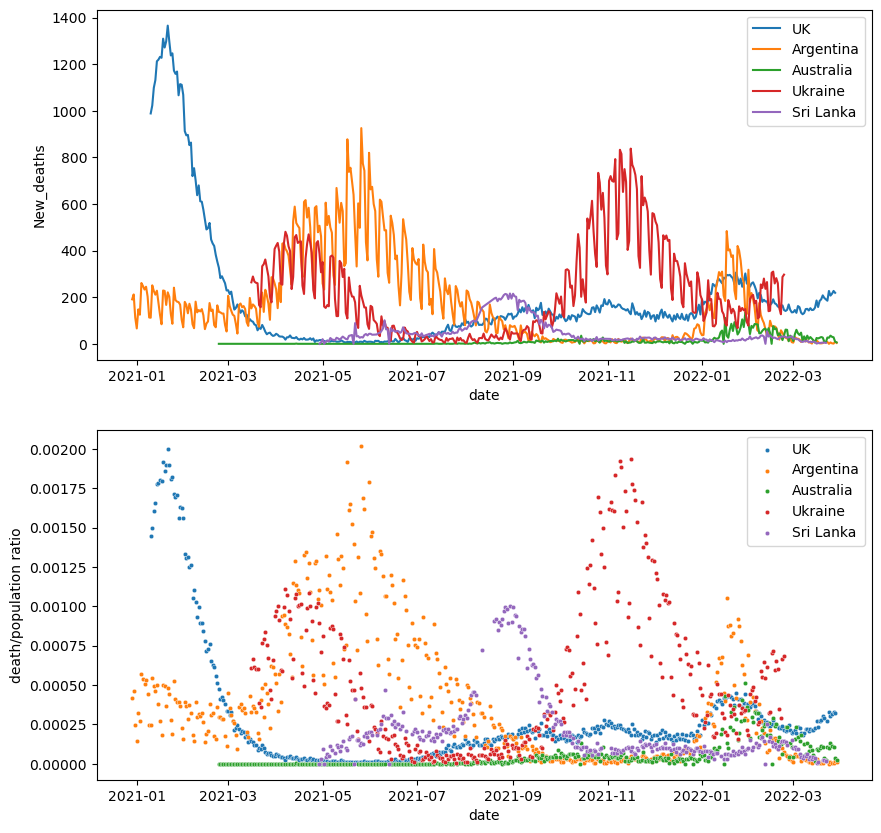

In [608]:
#Retrieve the data for a select few countries for comparison
australia_data = df.loc[df["country"]=="Australia"]
uk_data = df.loc[df["country"]=="The United Kingdom"]
argentina_data = df.loc[df["country"]=="Argentina"]
ukraine_data = df.loc[df["country"]=="Ukraine"]
srilanka_data = df.loc[df["country"]=="Sri Lanka"]

#plot the data for each country on a number of subplots
fig, ax = plt.subplots(2,1, figsize=(10,10))
labels = ["UK","Argentina","Australia","Ukraine","Sri Lanka"]
sns.lineplot(ax = ax[0], data = uk_data, x="date", y="New_deaths")
sns.lineplot(ax = ax[0], data = argentina_data, x="date", y="New_deaths")
sns.lineplot(ax = ax[0],data = australia_data, x="date", y="New_deaths")
sns.lineplot(ax = ax[0],data = ukraine_data, x="date", y="New_deaths")
sns.lineplot(ax = ax[0],data = srilanka_data, x="date", y="New_deaths")
ax[0].legend(labels=labels)
sns.scatterplot(ax = ax[1],s=10, data = uk_data, x="date", y="death/population ratio")
sns.scatterplot(ax = ax[1],s=10,data = argentina_data, x="date", y="death/population ratio")
sns.scatterplot(ax = ax[1],s=10,data = australia_data, x="date", y="death/population ratio")
sns.scatterplot(ax = ax[1],s=10,data = ukraine_data, x="date", y="death/population ratio")
sns.scatterplot(ax = ax[1],s=10,data = srilanka_data, x="date", y="death/population ratio")
plt.legend(labels=labels)
plt.show()

The graphs above show a direct comparison of the 5 selected countries, the first graph shows the number of deaths throughout the time period in each country and the 2nd graph shows the same data but normalised to show the nunber of deaths as a percentage of the country's population.

We can see that the UK, Australia and the Ukraine all had spikes reaching deaths of near 0.002% of the population whereas Sri Lanka and Argentina had much maximum spikes of around 0.001% and 0.0005% respectively.

We can also see that most of the countries suffered from multiple spikes.

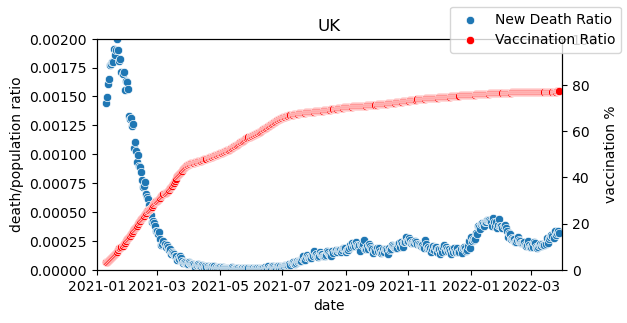

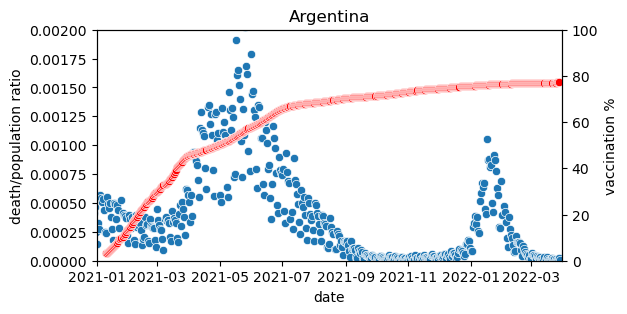

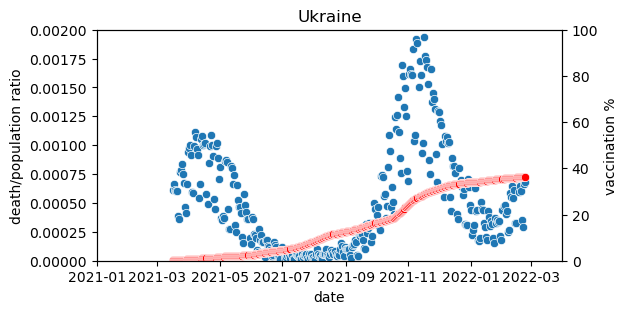

In [602]:
#plot the normalised death/population percentage and the vaccination rates on a timeline
fig,ax = plt.subplots(figsize = (6,3))
labels=["New Death Ratio", "Vaccination Ratio"]
sns.scatterplot(data = uk_data, x="date", y="death/population ratio")
ax2 = plt.twinx()
ax.set_ylim(0,0.002)
ax2.set_ylim(0,100)
ax.set_title("UK")
sns.scatterplot(data = uk_data, x="date",color = "r", y="vaccination %",ax=ax2)
plt.figlegend(labels, loc = 'upper right', ncol=1, labelspacing=0.5)
ax.set_xlim([datetime.date(2021, 1, 1), datetime.date(2022, 3, 31)])
plt.show()

fig,ax = plt.subplots(figsize = (6,3))
sns.scatterplot(data = argentina_data, x="date", y="death/population ratio")
ax2 = plt.twinx()
ax.set_ylim(0,0.002)
ax2.set_ylim(0,100)
ax.set_title("Argentina")
sns.scatterplot(data = uk_data, x="date",color = "r", y="vaccination %",ax=ax2)
ax.set_xlim([datetime.date(2021, 1, 1), datetime.date(2022, 3, 31)])
plt.show()

fig,ax = plt.subplots(figsize = (6,3))
ax.set_title("Ukraine")
sns.scatterplot(data = ukraine_data, x="date", y="death/population ratio")
ax2 = plt.twinx()
ax.set_ylim(0,0.002)
ax2.set_ylim(0,100)
ax.set_xlim([datetime.date(2021, 1, 1), datetime.date(2022, 3, 31)])
sns.scatterplot(data = ukraine_data, x="date",color = "r", y="vaccination %",ax=ax2)
plt.show()


Comparing the data for Argentina and Ukraine who have similar populations but opposing vaccination rates, we can see that Argentina suffered the majority of deaths in the initial period of the records, pre 2021-06, as vaccination rates below 60%, with a second much lower spike with vaccination rates around 80%.

The Ukraine suffered two spikes also with the first also around 2021-05 with vaccination rates at 0-10% but suffered a spike almost double the initial spike later when vaccination rates were at approximately 30% in 2021-12.

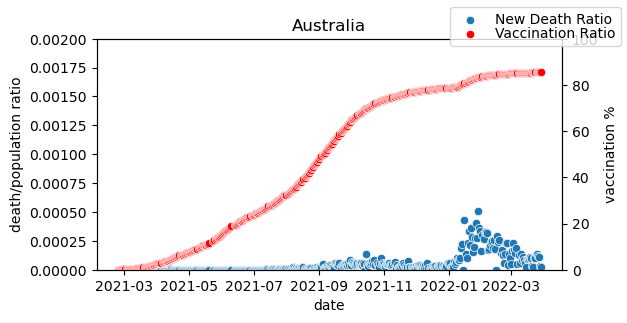

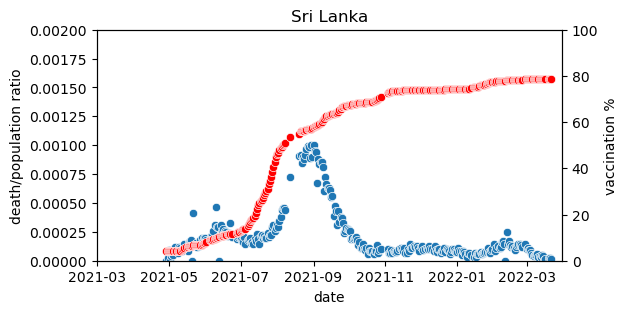

In [604]:
#plot the normalised death/population percentage and the vaccination rates on a timeline
fig,ax = plt.subplots(figsize = (6,3))
ax.set_title("Australia")
sns.scatterplot(data = australia_data, x="date", y="death/population ratio")
ax2 = plt.twinx()
ax.set_ylim(0,0.002)
ax2.set_ylim(0,100)
sns.scatterplot(data = australia_data, x="date",color = "r", y="vaccination %",ax=ax2)
plt.figlegend(labels, loc = 'upper right', ncol=1, labelspacing=0.)
plt.show()

fig,ax = plt.subplots(figsize = (6,3))
ax.set_title("Sri Lanka")
sns.scatterplot(data = srilanka_data, x="date", y="death/population ratio")
ax2 = plt.twinx()
ax.set_ylim(0,0.002)
ax.set_ylim(0,0.002)
ax2.set_ylim(0,100)
ax.set_xlim([datetime.date(2021, 3, 1), datetime.date(2022, 3, 31)])
sns.scatterplot(data = srilanka_data, x="date",color = "r", y="vaccination %",ax=ax2)
plt.show()

The above comparison shows that Australia did not have many deaths at all with the maximum occuring late on in the data around 2022-02, whereas Sri Lanka suffered the most deaths in 2021-09. This discrepancy is likely due to Australia's government policy of strict lockdowns early on and closure of the borders not allowing covid to spread.

The vaccination rate curves follow a similar path with Sri Lanka's starting a little later than Australia.

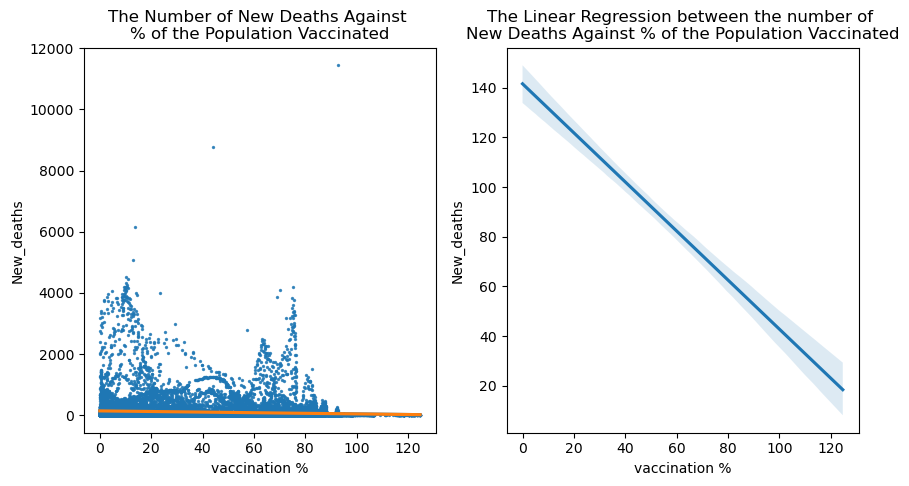

In [607]:
#remove negatively death values for the scatter graph
scatter_df = df.loc[(df["New_deaths"] >= 0)]

#plot all the data and fit a linear regression line
fig, ax = plt.subplots(1,2,figsize = (10,5))
sns.regplot(ax=ax[0],data=scatter_df,x="vaccination %",y="New_deaths",fit_reg = True,scatter=True,scatter_kws={'s':2})
sns.regplot(ax=ax[0],data=scatter_df,x="vaccination %",y="New_deaths",fit_reg = True,scatter=False)
sns.regplot(ax=ax[1],data=scatter_df,x="vaccination %",y="New_deaths",fit_reg = True,scatter=False,scatter_kws={'s':2})
ax[0].set_title("""The Number of New Deaths Against 
% of the Population Vaccinated""")
ax[1].set_title("""The Linear Regression between the number of 
New Deaths Against % of the Population Vaccinated""")
plt.show()



The above graphs present the number of deaths against the vaccination rate for the entirety of the data. The first grpah makes it difficult to determine any correlation or relationship, however the second graph shoes a plot of the linear regression, clearly showing an overall decline in number of deaths as the vaccination rate decreases, the gradient of this line can be roughly calculated to be -0.875, showing a relatively strong negative correlation.

Text(0.5, 1.0, 'Countries Comparison')

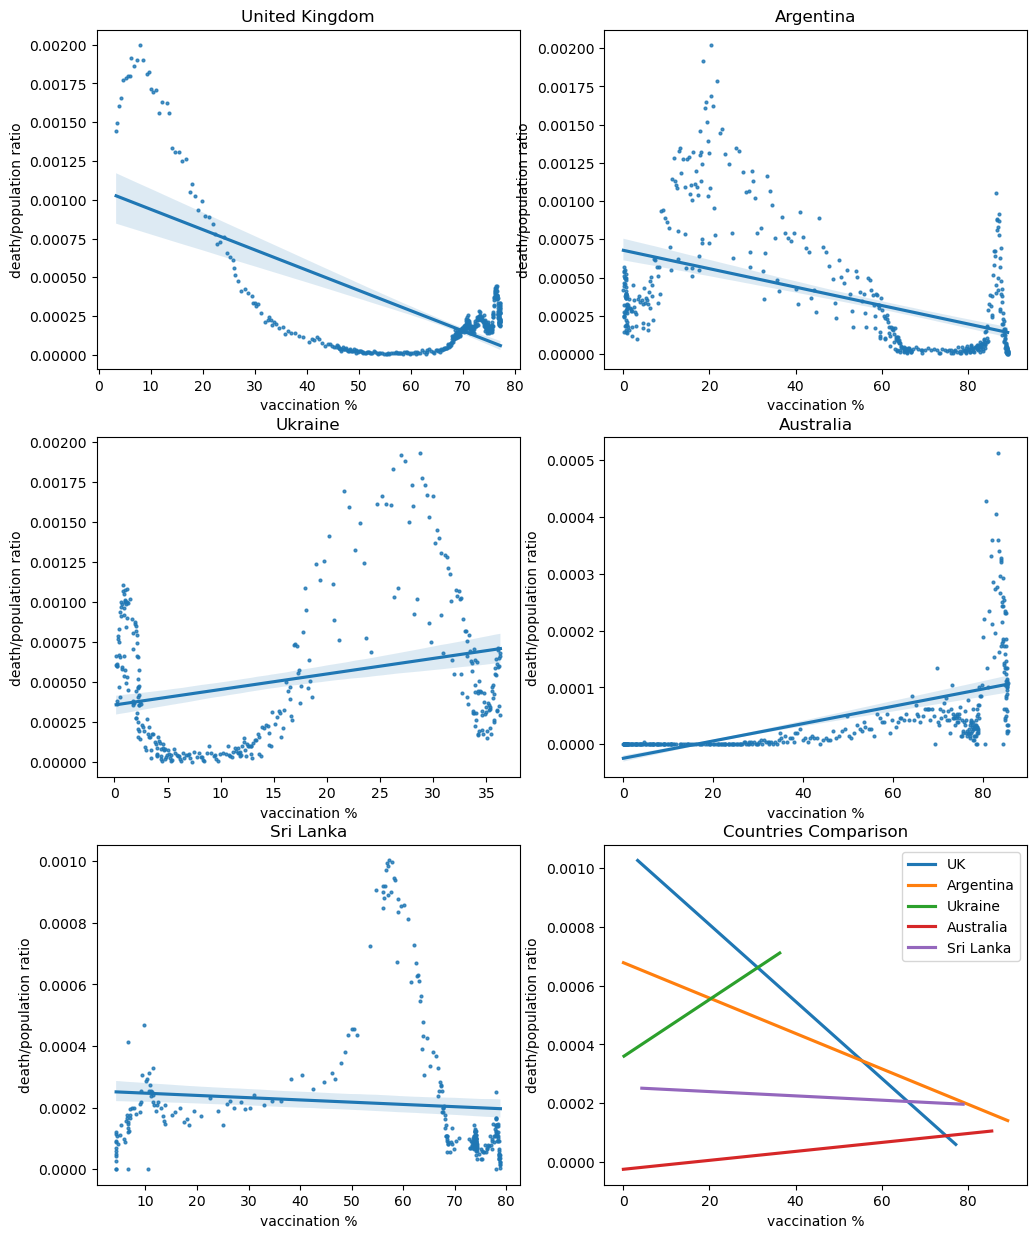

In [562]:
#remove negatively death values for the scatter graph
fig, ax = plt.subplots(3,2,figsize = (12,15))
sns.regplot(ax=ax[0,0],data=uk_data,x="vaccination %",y="death/population ratio",fit_reg = True,scatter=True,scatter_kws={'s':4})
sns.regplot(ax=ax[0,1],data=argentina_data,x="vaccination %",y="death/population ratio",fit_reg = True,scatter=True,scatter_kws={'s':4})
sns.regplot(ax=ax[1,0],data=ukraine_data,x="vaccination %",y="death/population ratio",fit_reg = True,scatter=True,scatter_kws={'s':4})
sns.regplot(ax=ax[1,1],data=australia_data,x="vaccination %",y="death/population ratio",fit_reg = True,scatter=True,scatter_kws={'s':4})
sns.regplot(ax=ax[2,0],data=srilanka_data,x="vaccination %",y="death/population ratio",fit_reg = True,scatter=True,scatter_kws={'s':4})

#plot all linear regression lines on the same graph to compare
sns.regplot(ci=None,ax=ax[2,1],data=uk_data,x="vaccination %",y="death/population ratio",fit_reg = True,scatter=False,scatter_kws={'s':4})
sns.regplot(ci=None,ax=ax[2,1],data=argentina_data,x="vaccination %",y="death/population ratio",fit_reg = True,scatter=False,scatter_kws={'s':4})
sns.regplot(ci=None,ax=ax[2,1],data=ukraine_data,x="vaccination %",y="death/population ratio",fit_reg = True,scatter=False,scatter_kws={'s':4})
sns.regplot(ci=None,ax=ax[2,1],data=australia_data,x="vaccination %",y="death/population ratio",fit_reg = True,scatter=False,scatter_kws={'s':4})
sns.regplot(ci=None,ax=ax[2,1],data=srilanka_data,x="vaccination %",y="death/population ratio",fit_reg = True,scatter=False,scatter_kws={'s':4})
labels = ["UK","Argentina","Ukraine","Australia","Sri Lanka"]
ax[2,1].legend(labels=labels)

ax[0,0].set_title("United Kingdom")
ax[0,1].set_title("Argentina")
ax[1,0].set_title("Ukraine")
ax[1,1].set_title("Australia")
ax[2,0].set_title("Sri Lanka")
ax[2,1].set_title("Countries Comparison")



# Comparison

The above graphs show the linear regression trendlines plotted for each country. Whilst linear regression lines may not give the closest mathmatical fit to the data they do show the trend of the data for easy comparison.

We can see looking at the last graph that the UK has the steepest decline in deaths with vaccination, suggesting that their vaccination policy of many and early, was the most successful in death prevention, Argentina  also followed a similar pattern with fewer deaths in the early period of vaccination. We can see that all 4 countries that achieved vaccination rates of 75%+ converge at death rates of between 0.0001 - 0.0002, with Australia being the only country following positive correlation with increased deaths with vaccination. This is likely due to the government policy maintaining death rates at an incredibly low rate in the initial phases whilst vaccines were introduced. This allowed the government to reach vaccination levels of 75%+ before allowing the spread of covid, whilst this has a positive correlation it does still converge at a similar death rate as the other highly vaccinated countries.

The Ukraine follows a different path, as vaccination rates only reached 35% we can see that there is also an increase of deaths with vaccination here also. From this we can infer that the vaccination rate of 35% in the Ukraine was insufficient in having significant impact on preventing deaths and a greater vaccination rate was required to achieve similar results to the other countries.